In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import h5netcdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
file_path_landfrac = r'C:\Users\jaybr\OneDrive\Desktop\UROP\sftlf_fx_CESM2-WACCM_G6sulfur_r1i1p1f2_gn.nc'
landfrac_dataset = xr.open_dataset(file_path_landfrac)
file_path_temp = r'C:\Users\jaybr\OneDrive\Desktop\UROP\NCAR_G6sulfur_tas2020-2030.nc'
temperature_dataset = xr.open_dataset(file_path_temp)
file_path_pr = r'C:\Users\jaybr\OneDrive\Desktop\UROP\NCAR_G6sulfur_pr2020-2069.nc'
pr_dataset = xr.open_dataset(file_path_pr)
file_path_area = r'C:\Users\jaybr\OneDrive\Desktop\UROP\areacella_fx_CESM2-WACCM_G6sulfur_r1i1p1f2_gn.nc'
area_dataset = xr.open_dataset(file_path_area)

C:\Users\jaybr\OneDrive\Anaconda\Lib\site-packages\xarray\conventions.py:428: SerializationWarning: variable 'sftlf' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
C:\Users\jaybr\OneDrive\Anaconda\Lib\site-packages\xarray\conventions.py:428: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
C:\Users\jaybr\OneDrive\Anaconda\Lib\site-packages\xarray\conventions.py:428: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
C:\Users\jaybr\OneDrive\Anaconda\Lib\site-packages\xarray\conventions.py:428: SerializationWarning: variable 'areacella' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [3]:
area_masked = area_dataset.where(landfrac_dataset['sftlf'] > 50)

In [4]:
temperature_dataset_masked = temperature_dataset.where(landfrac_dataset['sftlf'] > 50)

In [5]:
start = '2020-01-01'
end = '2029-12-31'

tas = temperature_dataset_masked['tas'].sel(time=slice(start, end))

In [6]:
MAT = tas.mean(dim='time')
pr_dataset_masked = pr_dataset.where(landfrac_dataset['sftlf'] > 50) 
pr = pr_dataset_masked['pr'].sel(time=slice(start, end))
MAP = (pr*60*60*24*365.25).mean(dim='time')
pr_converted = (pr*60*60*24*365.25)
Tcold = temperature_dataset_masked['tas'].sel(time=slice(start, end)).groupby("time.month").mean().min(dim='month')
Thot = temperature_dataset_masked['tas'].sel(time=slice(start, end)).groupby("time.month").mean().max(dim='month')

In [7]:
pr_OM = (pr*60*60*24*365.25/2)[np.logical_or(pr.time.dt.month>=10, pr.time.dt.month<=3)].mean(dim='time')
pr_AS = (pr*60*60*24*365.25/2)[np.logical_and(pr.time.dt.month>=4, pr.time.dt.month<=9)].mean(dim='time')
tas_OM = (tas)[np.logical_or(tas.time.dt.month>=10, tas.time.dt.month<=3)].mean(dim='time')
tas_AS = (tas)[np.logical_and(tas.time.dt.month>=4, tas.time.dt.month<=9)].mean(dim='time')

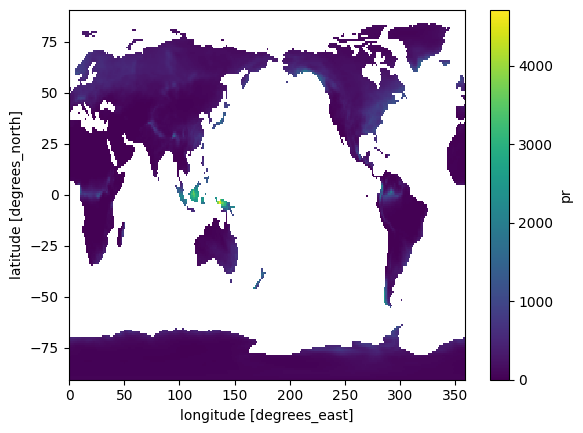

In [8]:
P_winter = xr.where((tas_OM>tas_AS), pr_AS, pr_OM)
P_summer = xr.where((tas_OM>tas_AS), pr_OM, pr_AS)
Pdry =  pr_converted.sel(time=slice(start, end)).groupby("time.month").mean().min(dim='month')
Pdry.plot()

In [9]:
NH_sum = pr_converted.sel(time=pr_converted['time.month'].isin([4,5,6,7,8,9]))
NH_sum_min = NH_sum.min(dim='time')
Psdry_NH = NH_sum_min.where(NH_sum_min['lat']>0)

In [10]:
SH_sum = pr_converted.sel(time=pr_converted['time.month'].isin([10,11,12,1,2,3]))
SH_sum_min = SH_sum.min(dim='time')
Psdry_SH = SH_sum_min.where(SH_sum_min['lat'] < 0)

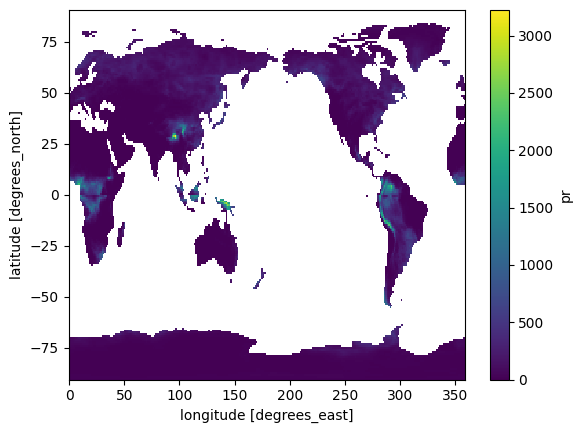

In [11]:
Psdry = Psdry_NH.combine_first(Psdry_SH)
Psdry.plot()

In [12]:
SH_wint = pr_converted.sel(time=pr_converted['time.month'].isin([4,5,6,7,8,9]))
NH_wint = pr_converted.sel(time=pr_converted['time.month'].isin([10, 11, 12, 1, 2, 3]))

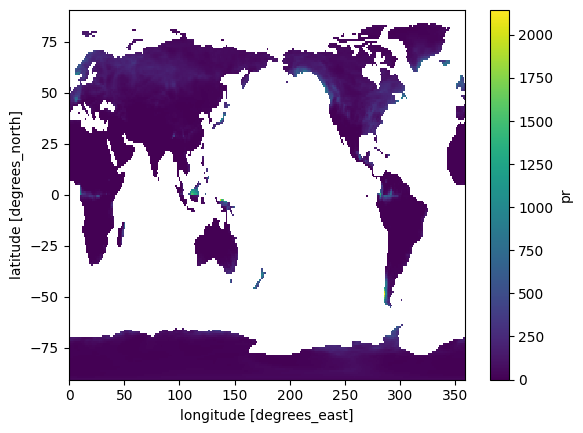

In [13]:
SH_wint_min = SH_wint.min(dim='time')
Pwdry_SH = SH_wint_min.where(SH_wint_min['lat'] < 0) 
NH_wint_min = NH_wint.min(dim='time')
Pwdry_NH = NH_wint_min.where(NH_wint_min['lat'] > 0) 
Pwdry = Pwdry_NH.combine_first(Pwdry_SH)
Pwdry.plot()

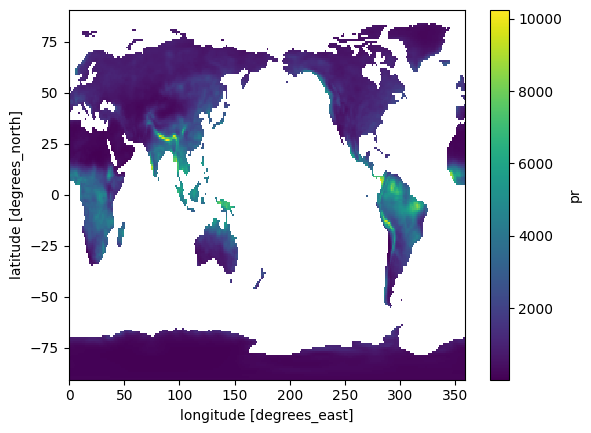

In [14]:
P_winter = xr.where((tas_OM>tas_AS), pr_AS, pr_OM)
P_summer = xr.where((tas_OM>tas_AS), pr_OM, pr_AS)
Pwet =  pr_converted.sel(time=slice(start, end)).groupby("time.month").mean().max(dim='month')
Pwet.plot()

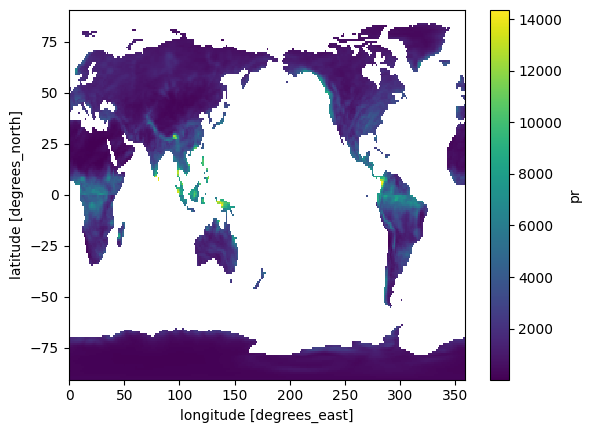

In [15]:
NH_wint_max = NH_wint.max(dim='time')
Pwwet_NH = NH_wint_max.where(NH_wint_max['lat']>0)
SH_wint_max = SH_wint.max(dim='time')
Pwwet_SH = SH_wint_max.where(SH_wint_max['lat']<0)
Pwwet = Pwwet_NH.combine_first(Pwwet_SH)
Pwwet.plot()

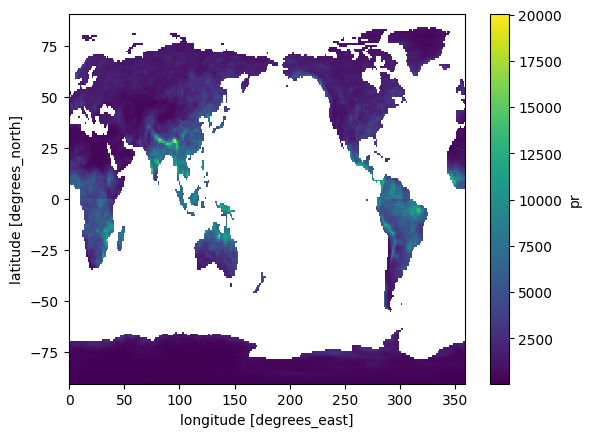

In [16]:
NH_sum_max = NH_sum.max(dim='time')
Pswet_NH = NH_sum_max.where(NH_sum_max['lat']>0)
SH_sum_max = SH_sum.max(dim='time')
Pswet_SH = SH_sum_max.where(SH_sum_max['lat']<0)
Pswet = Pswet_NH.combine_first(Pswet_SH)
Pswet.plot()

In [17]:
D = xr.where(np.logical_and((Thot>283.15), (Tcold<=273.15)), True, False)

In [18]:
file_path_arid = r'D:\G6sulfur\ARID_dataset_2020s_G6sulfur.nc'
arid = xr.open_dataset(file_path_arid)
B = area_masked['areacella']*arid["B"]

B_mask = xr.where(np.logical_not(B), True, False)

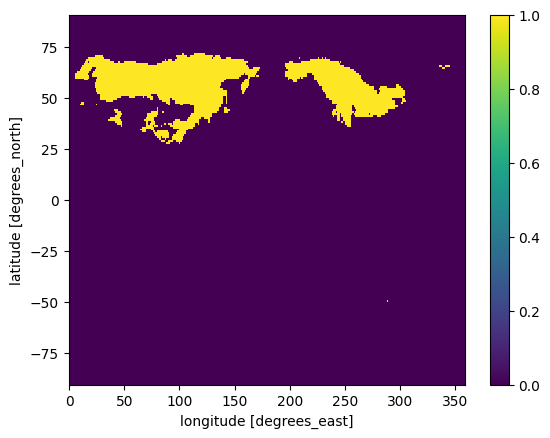

In [19]:
D_masked = xr.where(np.logical_and(B_mask, D), True, False)
D_masked.plot()

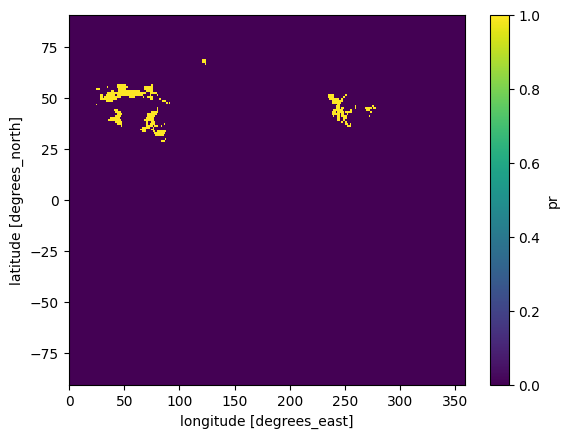

In [20]:
s_crit_1 = Psdry < 40
s_crit_2 = (Psdry < (Pwwet/3))
s = xr.where(np.logical_and(s_crit_1, s_crit_2), True, False)
Ds = xr.where(np.logical_and(s, D_masked), True, False)
Ds.plot()

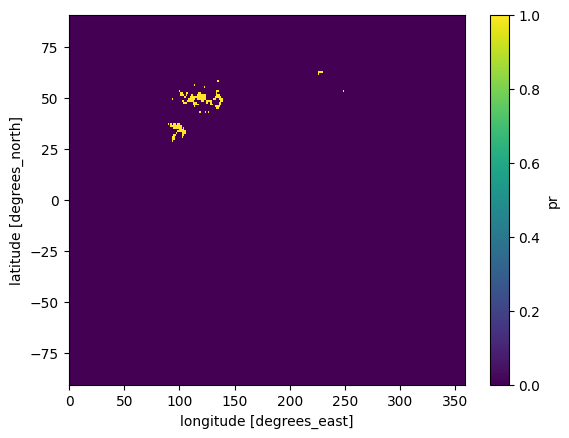

In [21]:
w_crit = (Pwdry < (Pswet/10))
maskout_s_1 = Psdry > 40
maskout_s_2 = (Psdry > (Pwwet/3))
Dw_1 = xr.where(np.logical_and(w_crit, D_masked), True, False)
Dw_2 = xr.where(np.logical_and(maskout_s_1, maskout_s_2), True, False)
Dw = xr.where(np.logical_and(Dw_1, Dw_2), True, False)
Dw.plot()

masked out s conditions, and it seems accurate/realistic, but prob double check (without masking out s, it looks like it overlaps s)

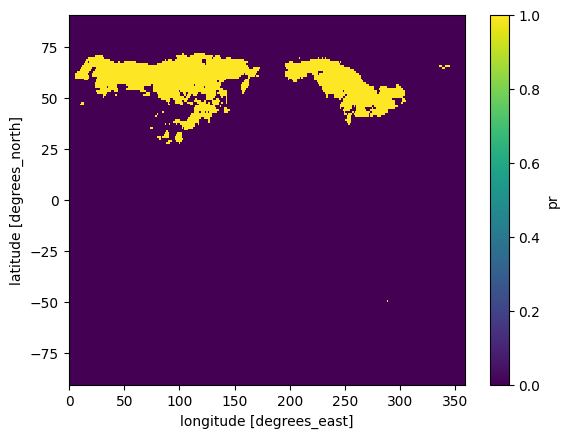

In [22]:
Df_crit = xr.where(np.logical_and((~Dw), (~Ds)), True, False)
Df = xr.where(np.logical_and(Df_crit, D_masked), True, False)
Df.plot()

In [23]:
#np.logical_not or ~ shortcut -- turn ocean to 0 or nan

In [24]:
tas_monthly = tas.groupby('time.month').mean()
tas_283 = xr.where((tas_monthly > 283.15), True, False)
Tmon10 = tas_283.sum(dim='month')

In [25]:
a = (Thot >= (273.15+22))

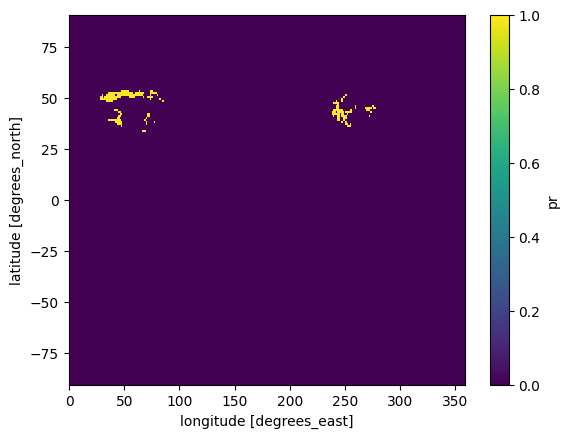

In [26]:
Dsa = xr.where(np.logical_and(Ds, a), True, False)
Dsa.plot()

maybe mask arid out.. because Kazakhstan isn't supposed to be cold apparently

alright this looks ok.. curious to see where Dsc areas will be but ok

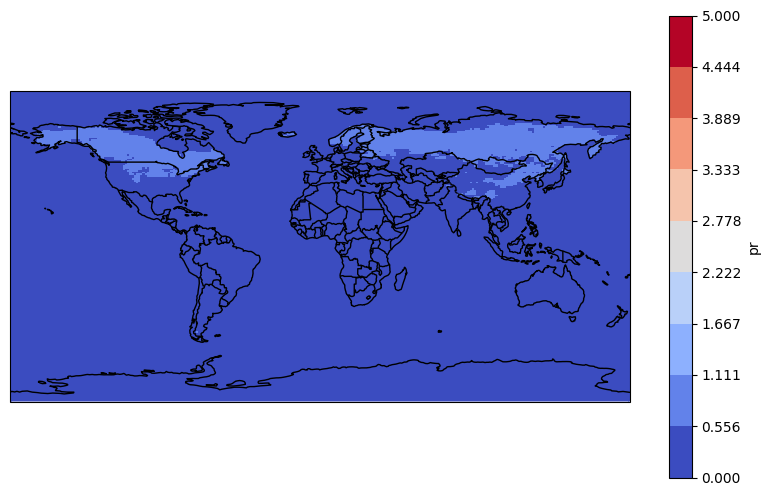

In [27]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

contour_levels = np.linspace(0, 5, 10)  
contour_plot = Df.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=contour_levels, add_colorbar=True)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

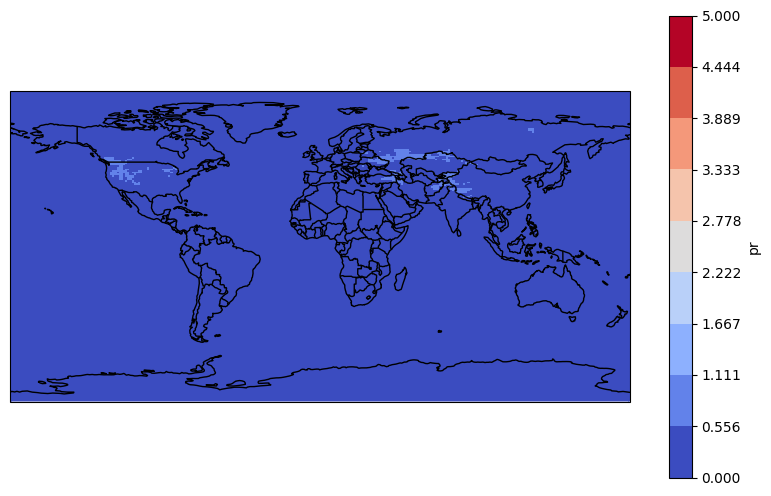

In [28]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

contour_levels = np.linspace(0, 5, 10)  
contour_plot = Ds.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=contour_levels, add_colorbar=True)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

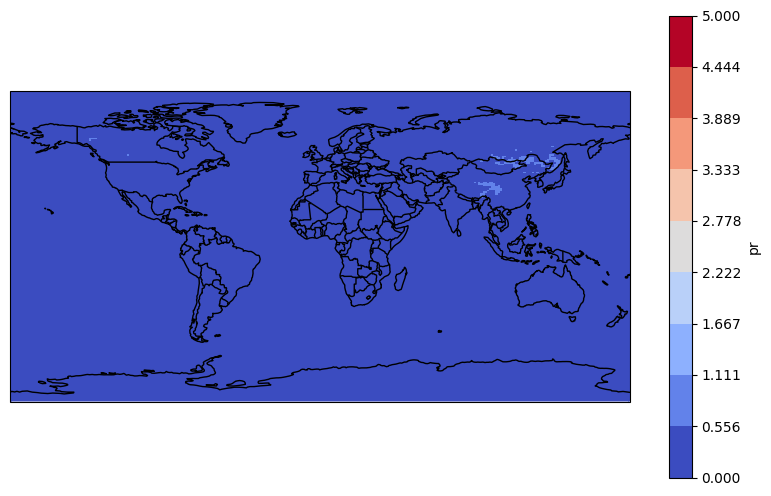

In [29]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

contour_levels = np.linspace(0, 5, 10)  
contour_plot = Dw.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=contour_levels, add_colorbar=True)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

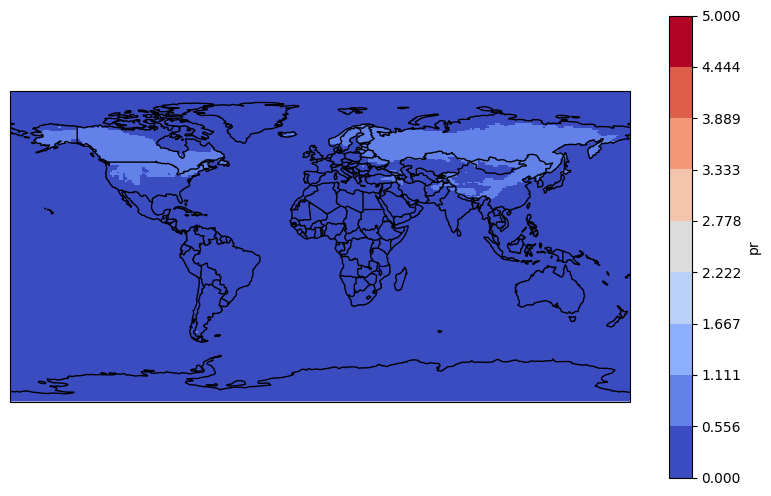

In [30]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

contour_levels = np.linspace(0, 5, 10)  
contour_plot = (Dw + Df + Ds).plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=contour_levels, add_colorbar=True)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

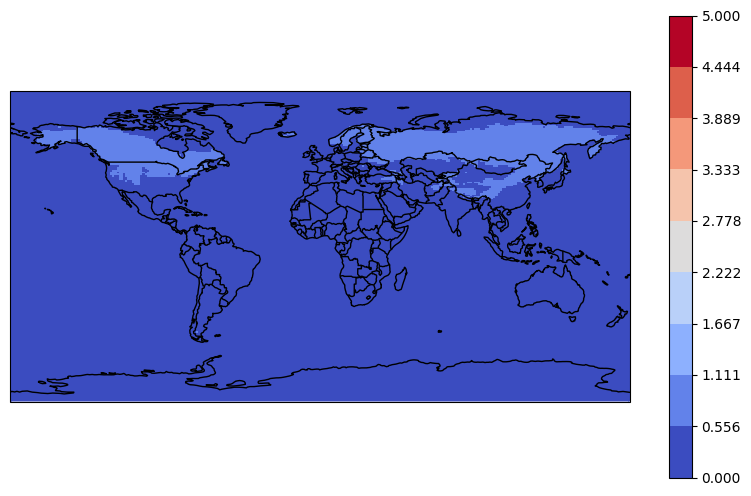

In [31]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

contour_levels = np.linspace(0, 5, 10)  
contour_plot = D_masked.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=contour_levels, add_colorbar=True)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

D and subsets of D match up, just double-checking every subset from here

TRUE SUBSET VARIABLES: D_masked, Df, Ds, Dw <-- shouldn't have to mask out B anymore because they all have D_masked in them, and D_masked masks out B

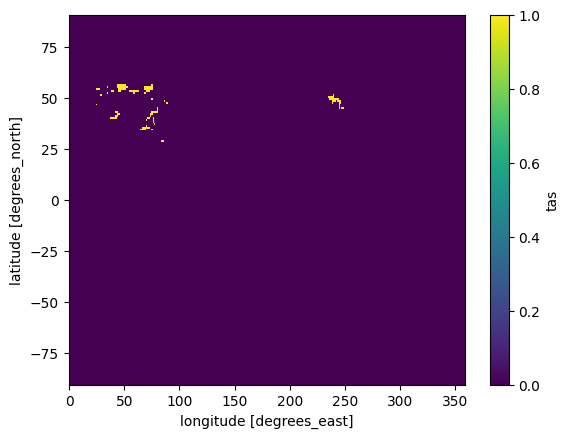

In [32]:
b = Tmon10>=4
b_crit = xr.where(np.logical_and((~a), b), True, False)
Dsb = xr.where(np.logical_and(b_crit, Ds), True, False)
Dsb.plot()

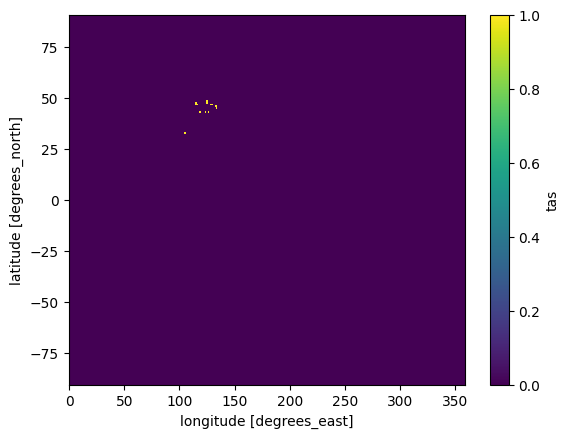

In [33]:
Dwa = xr.where(np.logical_and(a, Dw), True, False)
Dwa.plot()

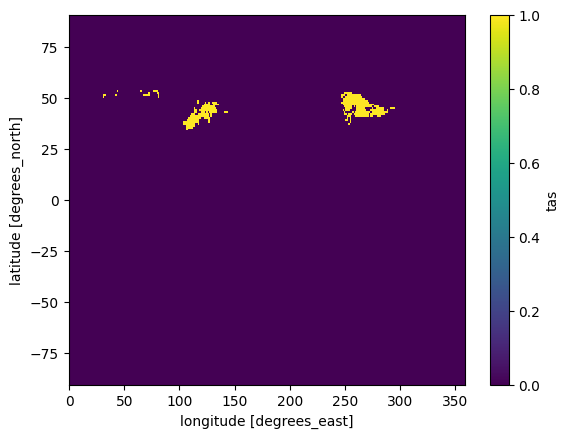

In [34]:
Dfa = xr.where(np.logical_and(a, Df), True, False)
Dfa.plot()

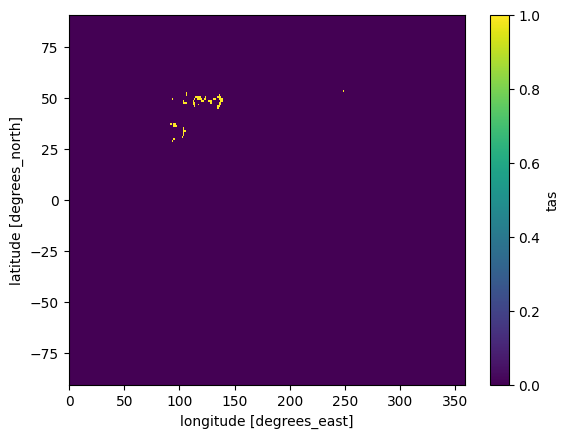

In [35]:
Dwb = xr.where(np.logical_and(b_crit, Dw), True, False)
Dwb.plot()

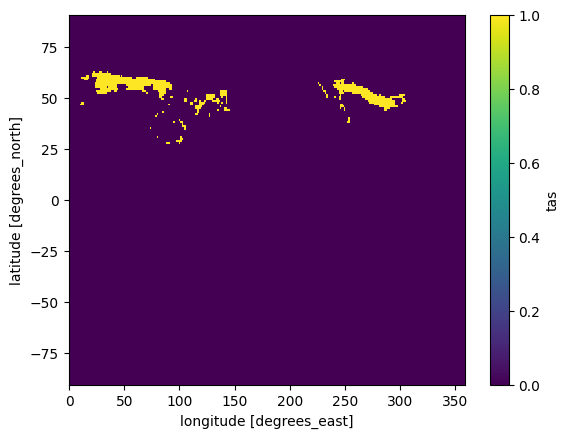

In [36]:
Dfb = xr.where(np.logical_and(b_crit, Df), True, False)
Dfb.plot()

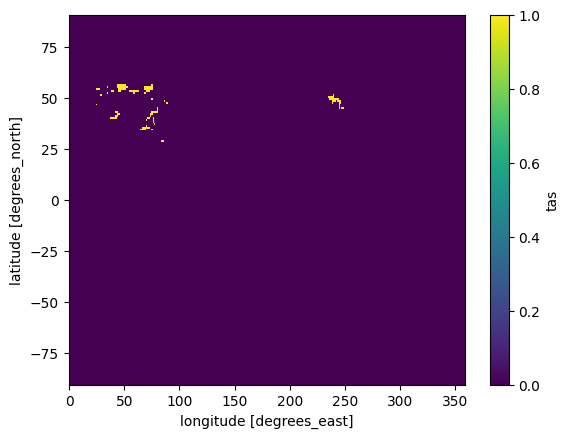

In [37]:
Dsb = xr.where(np.logical_and(b_crit, Ds), True, False)
Dsb.plot()

In [38]:
not_a_b = xr.where(np.logical_and((~a), (~b)), True, False)
d_crit = (Tcold < (273.15-38))
#apparently there are zero gridpts for all of them and D in general.. UM
#there are very small amounts of d regions.. except for a blob of Dwd and Dfd in siberia, EXTREMELY little Dsd

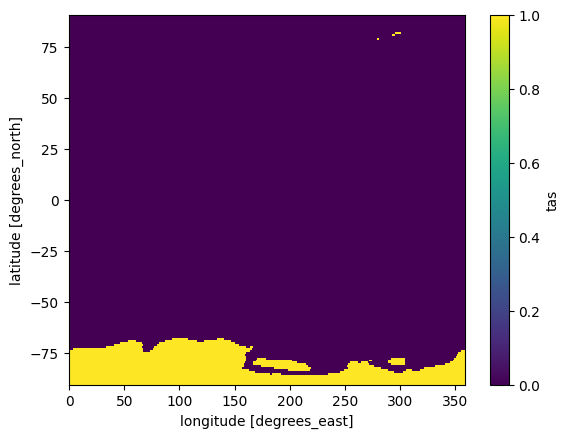

In [39]:
d_crit.plot()

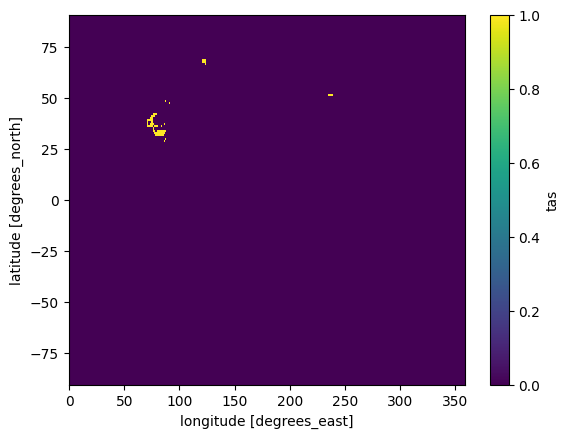

In [40]:
Dsc = xr.where(np.logical_and(not_a_b, Ds), True, False)
Dsc.plot()

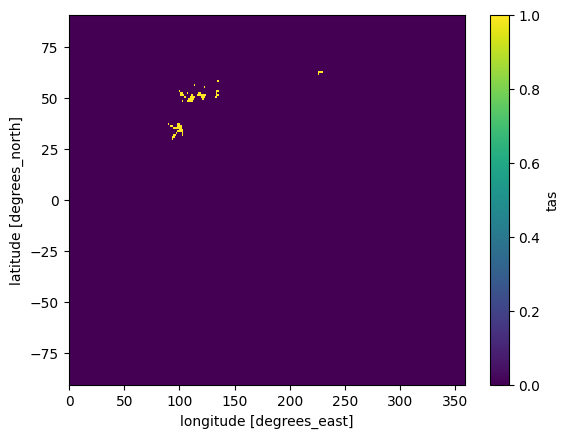

In [41]:
Dwc = xr.where(np.logical_and(not_a_b, Dw), True, False)
Dwc.plot()

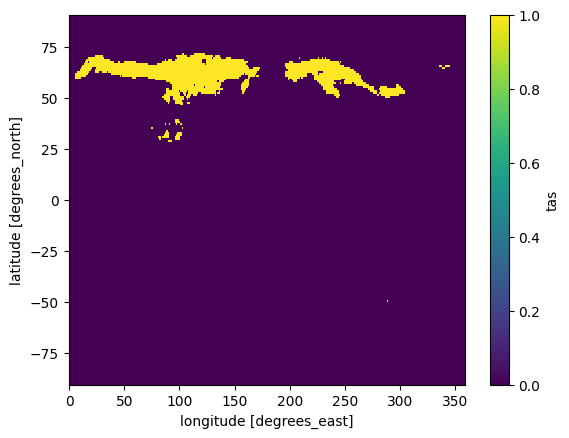

In [42]:
Dfc = xr.where(np.logical_and(not_a_b, Df), True, False)
Dfc.plot()

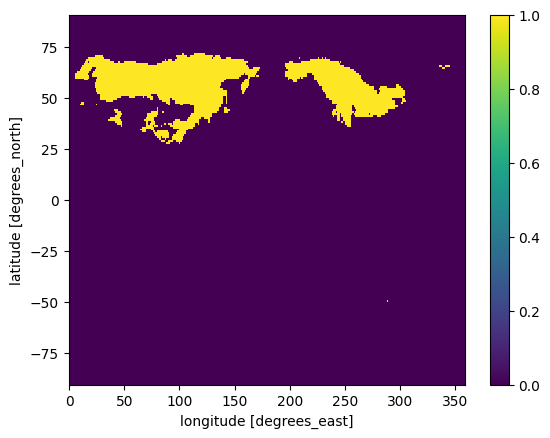

In [43]:
(Dfc + Dfb + Dfa + Dsc + Dsb + Dsa + Dwc + Dwb + Dwa).plot()

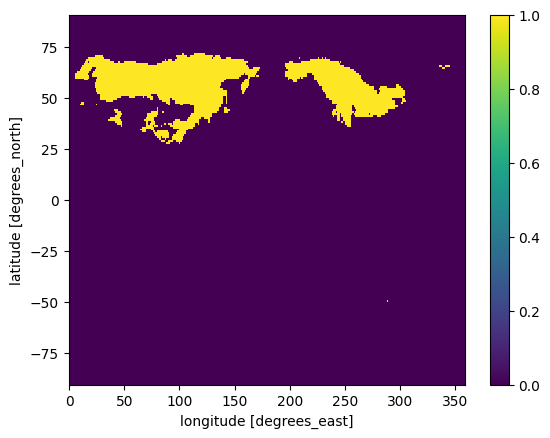

In [44]:
D_masked.plot()

there's no d climates?????? HELLO???? 

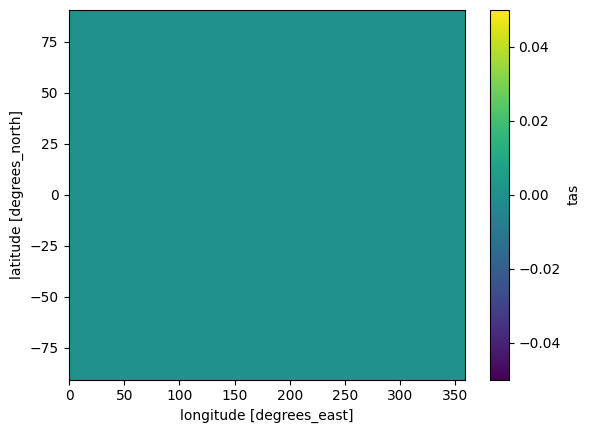

In [45]:
Dsd_1 = xr.where(np.logical_and(not_a_b, Ds), True, False)
d = (Tcold<(273.15-38))
Dsd = xr.where(np.logical_and(d, Dsd_1), True, False)
Dsd.plot()

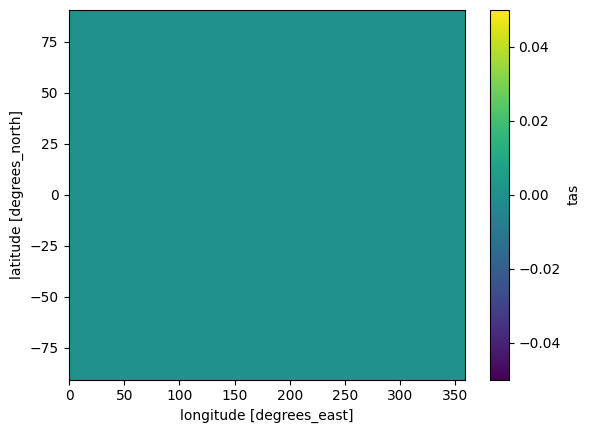

In [46]:
Dwd_1 = xr.where(np.logical_and(not_a_b, Dw), True, False)
d = (Tcold<(273.15-38))
Dwd = xr.where(np.logical_and(d, Dwd_1), True, False)
Dwd.plot()

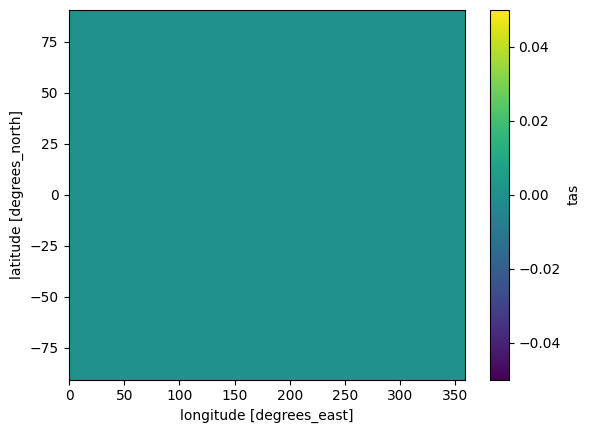

In [47]:
Dfd_1 = xr.where(np.logical_and(not_a_b, Df), True, False)
d = (Tcold<(273.15-38))
Dfd = xr.where(np.logical_and(d, Dfd_1), True, False)
Dfd.plot()

In [48]:
D_set = xr.Dataset()

In [49]:
D_set['lat'] = D_masked.lat
D_set['lon'] = D_masked.lon

In [50]:
D_set

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    *empty*

In [51]:
D_set['D'] = D_masked
D_set['D'].attrs= {'long_name' : 'cold'}
D_set

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    D        (lat, lon) bool False False False False ... False False False False

In [52]:
D_set['Ds'] = Ds
D_set['Ds'].attrs= {'long_name' : 'dry summer'}

In [53]:
D_set['Dw'] = Dw
D_set['Dw'].attrs= {'long_name' : 'dry winter'}

In [54]:
D_set['Df'] = Df
D_set['Df'].attrs= {'long_name' : 'without dry season'}

In [55]:
D_set['Dsa'] = Dsa
D_set['Dsa'].attrs= {'long_name' : 'dry, hot summer'}

In [56]:
D_set['Dsb'] = Dsb
D_set['Dsb'].attrs= {'long_name' : 'dry, warm summer'}

In [57]:
D_set['Dsc'] = Dsc
D_set['Dsc'].attrs= {'long_name' : 'dry, cold summer'}

In [58]:
D_set['Dsd'] = Dsd
D_set['Dsd'].attrs= {'long_name' : 'dry summer, very cold winter'}

In [59]:
D_set['Dwa'] = Dwa
D_set['Dwa'].attrs= {'long_name' : 'dry winter, hot summer'}

In [60]:
D_set['Dwb'] = Dwb
D_set['Dwb'].attrs= {'long_name' : 'dry winter, warm summer'}

In [61]:
D_set['Dwc'] = Dwc
D_set['Dwc'].attrs= {'long_name' : 'dry winter, cold summer'}

In [62]:
D_set['Dwd'] = Dwd
D_set['Dwd'].attrs= {'long_name' : 'dry, very cold winter'}

In [63]:
D_set['Dfa'] = Dfa
D_set['Dfa'].attrs= {'long_name' : 'without dry season, hot summer'}

In [64]:
D_set['Dfb'] = Dfb
D_set['Dfb'].attrs= {'long_name' : 'without dry season, warm summer'}

In [65]:
D_set['Dfc'] = Dfc
D_set['Dfc'].attrs= {'long_name' : 'without dry season, cold summer'}

In [66]:
D_set['Dfd'] = Dfd
D_set['Dfd'].attrs= {'long_name' : 'without dry season, very cold winter'}

In [67]:
D_set

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables: (12/16)
    D        (lat, lon) bool False False False False ... False False False False
    Ds       (lat, lon) bool False False False False ... False False False False
    Dw       (lat, lon) bool False False False False ... False False False False
    Df       (lat, lon) bool False False False False ... False False False False
    Dsa      (lat, lon) bool False False False False ... False False False False
    Dsb      (lat, lon) bool False False False False ... False False False False
    ...       ...
    Dwc      (lat, lon) bool False False False False ... False False False False
    Dwd      (lat, lon) bool False False False False ... False False False False
    Dfa      (lat, lon) bool False False False False ... False False False False
    Dfb      (lat, lon) bool False False False False ... False False False False
    Dfc      (lat, lon) bool False False False False ... False False False False
    Dfd      (lat, lon) bool False False False False ... False False False False

In [68]:
D_set.to_netcdf(path='/Users/jaybr/OneDrive/Desktop/UROP/COLD_dataset_2020s_G6sulfur.nc', mode='w')